# Covid-19 Data Analysis

## Dataset Information

This dataset contains anonymized patient-related information including health pre-conditions. 
It contains 21 features and 1,048,575 unique patients. In the Boolean features, 1 means "yes" and 2 means "no".

    usmer: Indicates whether the patient treated medical units of the first, second or third level.
    medical unit: type of institution of the National Health System that provided the care.
    sex: gender of the patient.
    patient type: wether the patient returned home or headed for hospitalization.
    date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.
    intubed: whether the patient was connected to the ventilator.
    pneumonia: whether the patient already have air sacs inflammation or not.
    age: of the patient.
    pregnant: whether the patient is pregnant or not.
    diabetes: whether the patient has diabetes or not.
    copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
    asthma: whether the patient has asthma or not.
    inmsupr: whether the patient is immunosuppressed or not.
    hypertension: whether the patient has hypertension or not.
    other disease: whether the patient has other disease or not.
    cardiovascular: whether the patient has heart or blood vessels related disease.
    obesity: whether the patient is obese or not.
    renal chronic: whether the patient has chronic renal disease or not.
    tobacco: whether the patient is a tobacco user.
    classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
    icu: Indicates whether the patient had been admitted to an Intensive Care Unit.



### Imports

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Import dataset

In [2]:
df = pd.read_csv('./covid19.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,female,returned home,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,male,returned home,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,male,hospitalization,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,female,returned home,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,male,returned home,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


,USMER,MEDICAL_UNIT,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,192706.000000,1.032572e+06,1.048575e+06,521310.000000,1.045237e+06,1.045572e+06,1.045596e+06,1.045171e+06,1.045471e+06,1.043530e+06,1.045499e+06,1.045543e+06,1.045569e+06,1.045355e+06,1.048575e+06,192543.000000
mean,1.632194e+00,8.980565e+00,1.825351,1.864379e+00,4.179410e+01,1.984403,1.880420e+00,1.985594e+00,1.969805e+00,1.986442e+00,1.844349e+00,1.973130e+00,1.980135e+00,1.847145e+00,1.981920e+00,1.919285e+00,5.305653e+00,1.912446
std,4.822084e-01,3.723278e+00,0.379668,3.423854e-01,1.690739e+01,0.123911,3.244694e-01,1.191554e-01,1.711242e-01,1.156451e-01,3.625247e-01,1.617045e-01,1.395369e-01,3.598474e-01,1.332413e-01,2.723973e-01,1.881165e+00,0.282647
min,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
25%,1.000000e+00,4.000000e+00,2.000000,2.000000e+00,3.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000
50%,2.000000e+00,1.200000e+01,2.000000,2.000000e+00,4.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000
75%,2.000000e+00,1.200000e+01,2.000000,2.000000e+00,5.300000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000
max,2.000000e+00,1.300000e+01,2.000000,2.000000e+00,1.210000e+02,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000


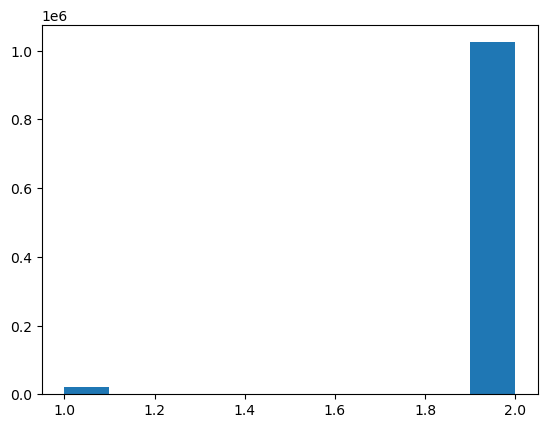

In [4]:
plt.hist(df["CARDIOVASCULAR"]);df.describe()

In [5]:
col_names = df.columns
col_names

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [6]:
sex_values = df['SEX'].unique()
sex_values

array(['female', 'male'], dtype=object)

### Change 'SEX' to numerical value

In [7]:
sex_mapping = {
    'female': 0,
    'male': 1
}

In [8]:
df['SEX'] = df['SEX'].map(sex_mapping)

In [9]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,0,returned home,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,1,returned home,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,1,hospitalization,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,0,returned home,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,1,returned home,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [10]:
ptype_values = df['PATIENT_TYPE'].unique()
ptype_values

array(['returned home', 'hospitalization'], dtype=object)

### Change 'PATIENT_TYPE' to numerical value

In [11]:
ptype_mapping = {
    'returned home': 0,
    'hospitalization': 1
}

In [12]:
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].map(ptype_mapping)

In [13]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,0,0,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,1,0,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,1,1,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,0,0,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,1,0,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


### Check NaN values

In [14]:
NaN_intubed_count = df['INTUBED'].isna().sum()
NaN_intubed_count

855869

In [15]:
NaN_pneumonia_count = df['PNEUMONIA'].isna().sum()
NaN_pneumonia_count

16003

In [16]:
NaN_pregnant_count = df['PREGNANT'].isna().sum()
NaN_pregnant_count

527265

In [17]:
NaN_diabetes_count = df['DIABETES'].isna().sum()
NaN_diabetes_count

3338

In [18]:
NaN_sex_count = df['SEX'].isna().sum()
NaN_sex_count

0

In [19]:
NaN_icu_count = df['ICU'].isna().sum()
NaN_icu_count

856032

In [20]:
NaN_diabetes_recount = df['DIABETES'].isna().sum()
NaN_diabetes_recount

3338

In [21]:
NaN_copd_count = df['COPD'].isna().sum()
NaN_copd_count

3003

In [22]:
NaN_asthma_count = df['ASTHMA'].isna().sum()
NaN_asthma_count

2979

In [23]:
NaN_inmsupr_count = df['INMSUPR'].isna().sum()
NaN_inmsupr_count

3404

In [24]:
NaN_hipertension_count = df['HIPERTENSION'].isna().sum()
NaN_hipertension_count

3104

In [25]:
NaN_other_count = df['OTHER_DISEASE'].isna().sum()
NaN_other_count

5045

In [26]:
NaN_cardio_count = df['CARDIOVASCULAR'].isna().sum()
NaN_cardio_count

3076

In [27]:
NaN_obs_count = df['OBESITY'].isna().sum()
NaN_obs_count

3032

In [28]:
NaN_renal_count = df['RENAL_CHRONIC'].isna().sum()
NaN_renal_count

3006

In [29]:
NaN_tobacco_count = df['TOBACCO'].isna().sum()
NaN_tobacco_count

3220

In [30]:
NaN_icu_count = df['ICU'].isna().sum()
NaN_icu_count

856032

In [31]:
NaN_patient_count = df['PATIENT_TYPE'].isna().sum()
NaN_patient_count

0

In [32]:
NaN_pregnant_count = df['PREGNANT'].isna().sum()
NaN_pregnant_count

527265

### Evaluate Values

In [33]:
pregnant_type = df['PREGNANT'].unique()
pregnant_type

array([ 2., nan,  1.])

In [34]:
icu_types = df['ICU'].unique()
icu_types

array([nan,  2.,  1.])

In [35]:
diabetes_types = df['DIABETES'].unique()
diabetes_types

array([ 2.,  1., nan])

In [36]:
patient_types = df['PATIENT_TYPE'].unique()
patient_types

array([0, 1])

In [37]:
intube_types = df['INTUBED'].unique()
intube_types

array([nan,  1.,  2.])

In [38]:
pregnant_types = df['PREGNANT'].unique()
pregnant_types

array([ 2., nan,  1.])

In [39]:
patient_types = df['PATIENT_TYPE'].unique()
patient_types

array([0, 1])

### Drop NaN Values

In [40]:
df_clean = df.dropna(subset=['PREGNANT', 'ICU','DIABETES', 'PATIENT_TYPE','INTUBED'])
df_clean

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,0,1,9999-99-99,2.0,1.0,40,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
8,2,1,0,1,9999-99-99,2.0,2.0,37,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,0,1,9999-99-99,2.0,2.0,25,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
16,2,1,0,1,9999-99-99,2.0,1.0,80,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0
56,2,1,0,1,9999-99-99,1.0,1.0,58,2.0,2.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048535,1,13,0,1,9999-99-99,2.0,2.0,79,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048553,2,13,0,1,9999-99-99,2.0,1.0,61,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048554,2,13,0,1,9999-99-99,2.0,1.0,63,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0
1048567,1,13,0,1,9999-99-99,2.0,2.0,23,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0


## Imputation by IterativeImputer

In [41]:
imput = IterativeImputer()

In [42]:
# Imputation on ICU
missing_icu = df.columns[df.isnull().any() & df.columns.str.contains('ICU')]

In [43]:
df[missing_icu] = imput.fit_transform(df.loc[:,missing_icu])

In [44]:
# Imputation on Pregnant
missing_pregnant = df.columns[df.isnull().any() & df.columns.str.contains('PREGNANT')]

In [45]:
df[missing_pregnant] = imput.fit_transform(df[missing_pregnant])

In [46]:
# Imputation on Patient Type
missing_intubed = df.columns[df.isnull().any() & df.columns.str.contains('INTUBED')]

In [47]:
df[missing_intubed] = imput.fit_transform(df[missing_intubed])

## Data Visualization

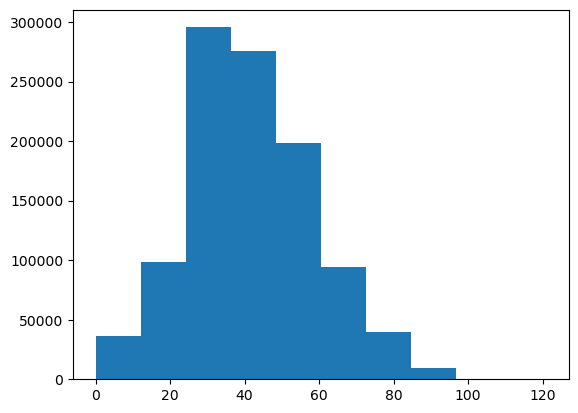

In [48]:
plt.hist(df["AGE"]);

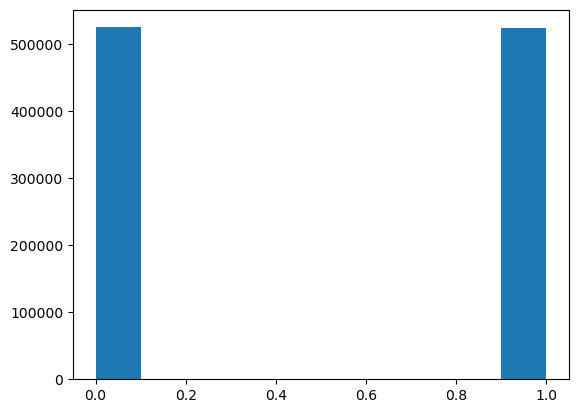

In [49]:
plt.hist(df["SEX"]);

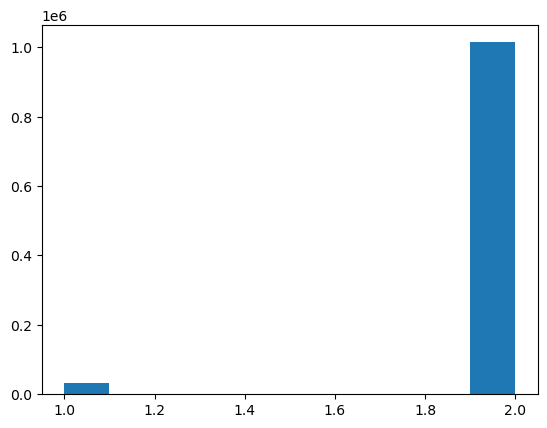

In [50]:
plt.hist(df["ASTHMA"]);

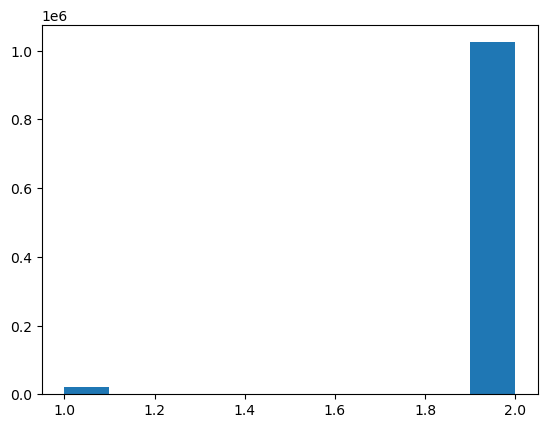

In [51]:
plt.hist(df["CARDIOVASCULAR"]);

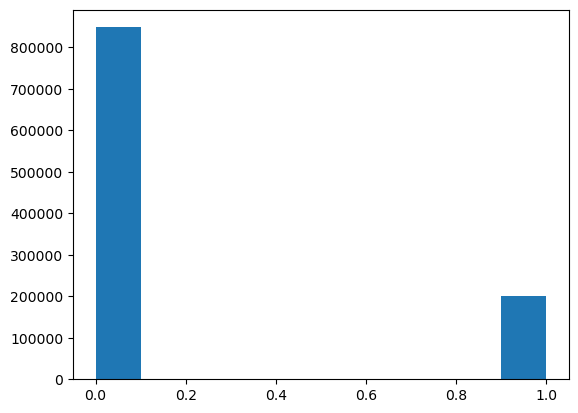

In [52]:
plt.hist(df["PATIENT_TYPE"]);

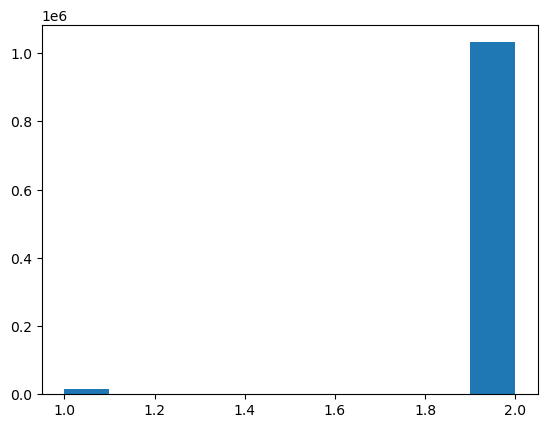

In [53]:
plt.hist(df["ICU"]);

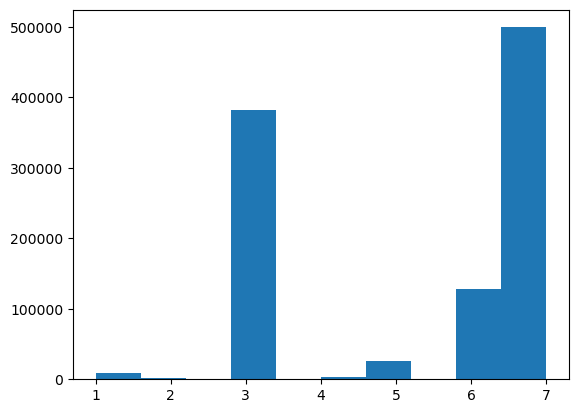

In [54]:
plt.hist(df["CLASIFFICATION_FINAL"]);

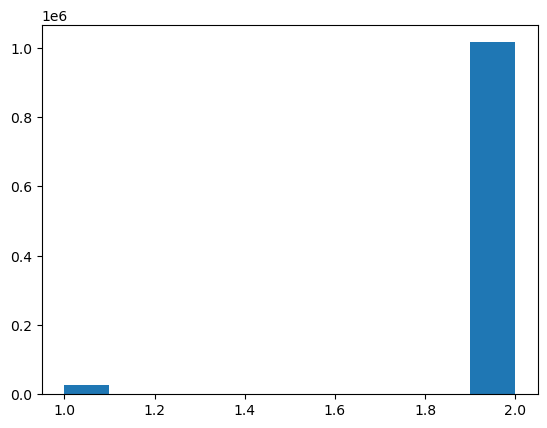

In [55]:
plt.hist(df["OTHER_DISEASE"]);

/var/folders/0n/nft8_zh96k32gb5k561yk3hc0000gn/T/ipykernel_52648/3113873151.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


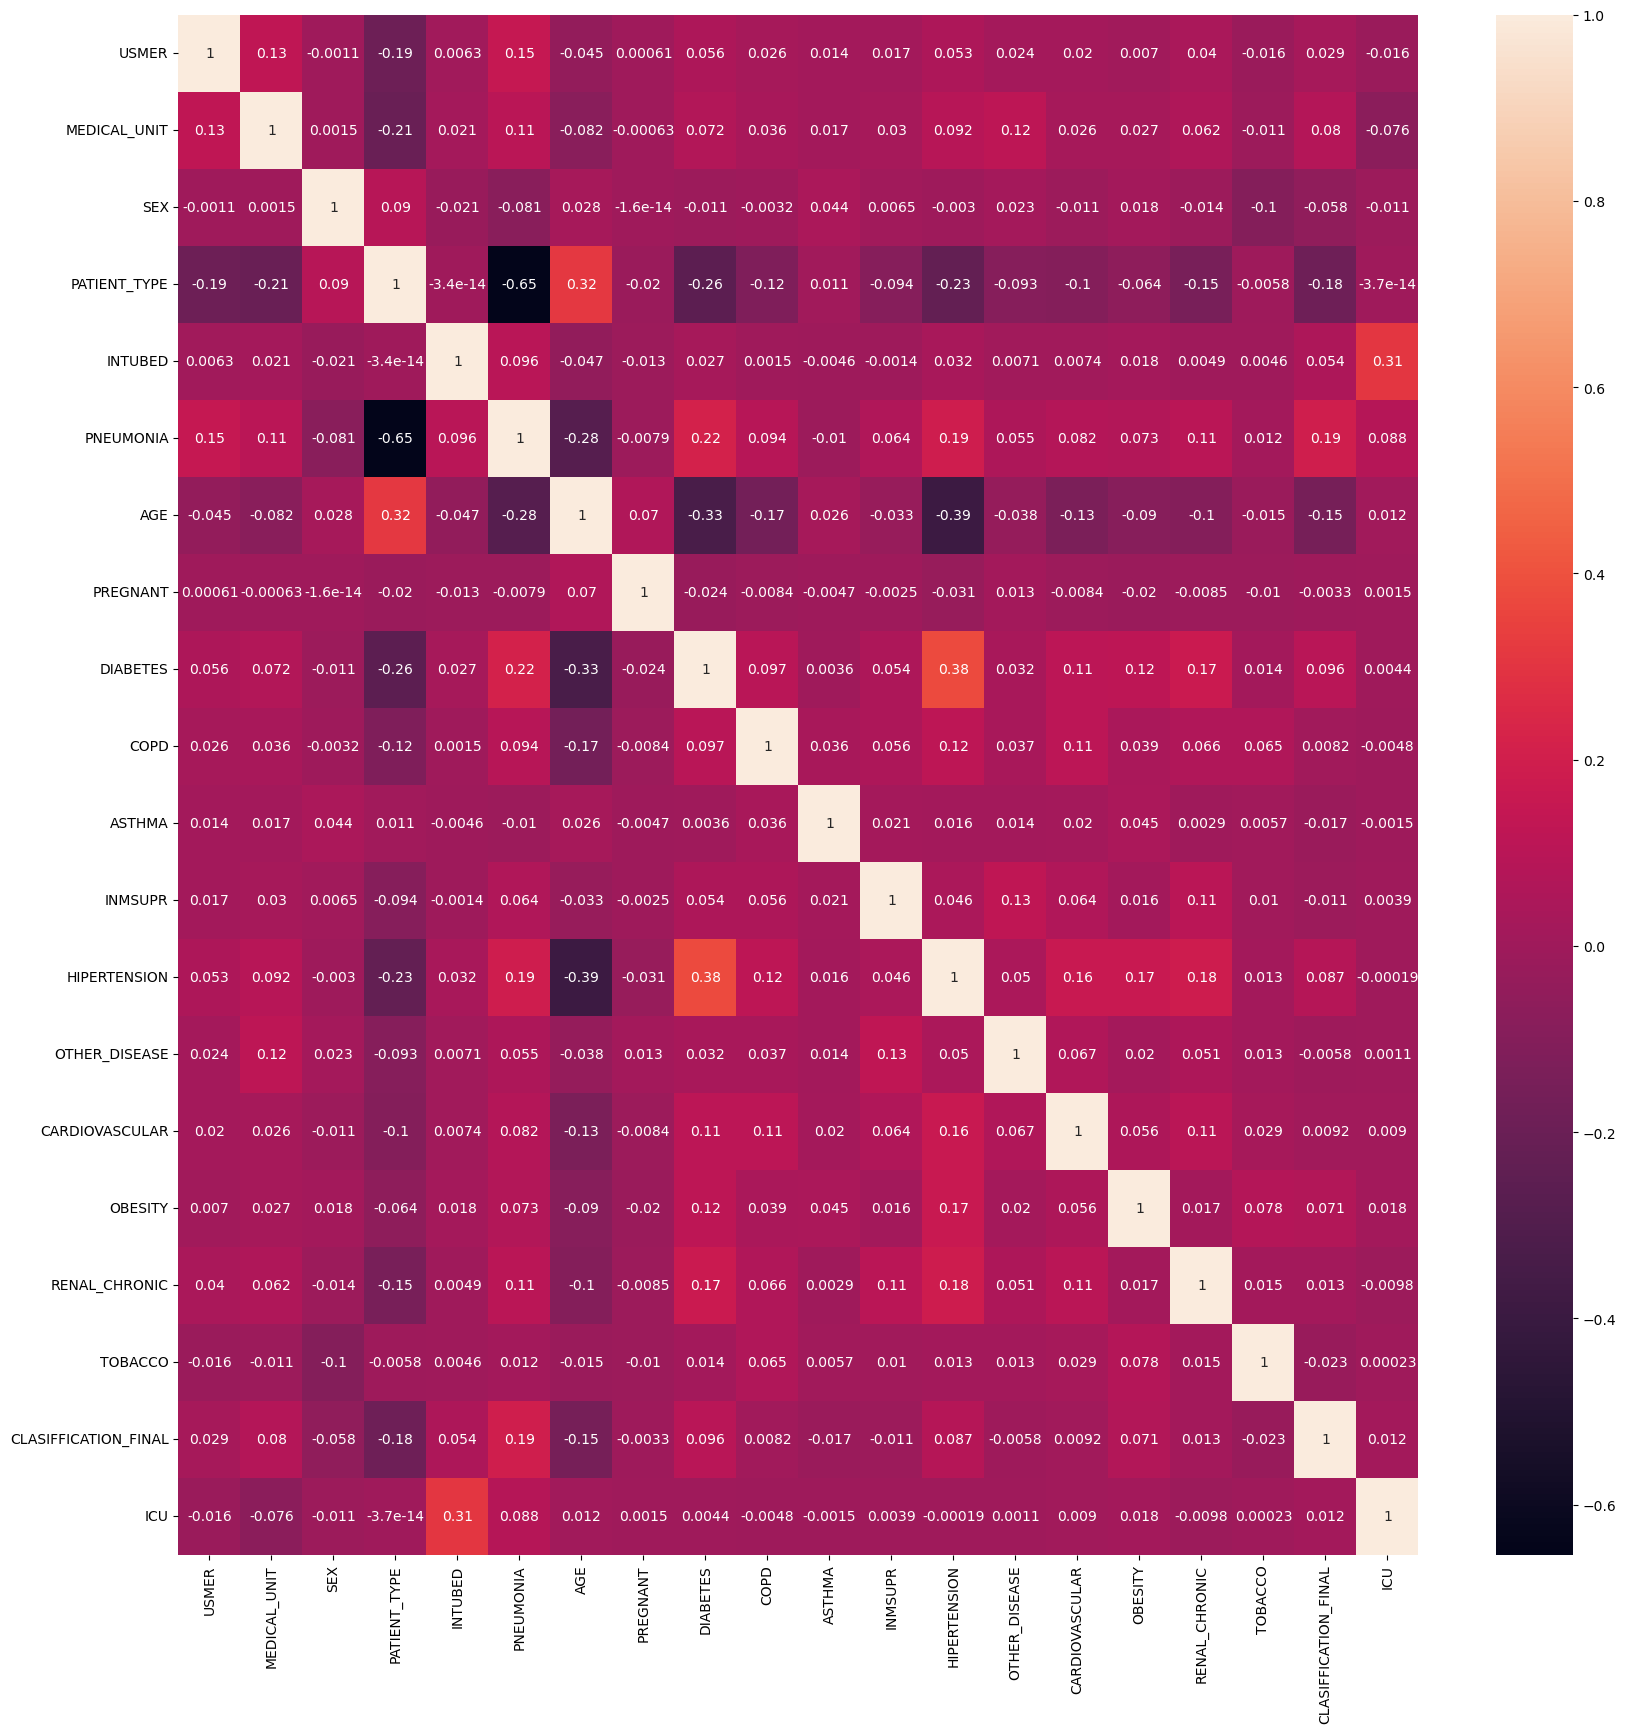

In [56]:
# create heatmap
f, ax = plt.subplots(figsize=[20,20])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [57]:
#Check for remaining NaN values
df_clean.isna().sum()

USMER                     0
MEDICAL_UNIT              0
SEX                       0
PATIENT_TYPE              0
DATE_DIED                 0
INTUBED                   0
PNEUMONIA                 0
AGE                       0
PREGNANT                  0
DIABETES                  0
COPD                     42
ASTHMA                   55
INMSUPR                 123
HIPERTENSION             44
OTHER_DISEASE           396
CARDIOVASCULAR           82
OBESITY                 119
RENAL_CHRONIC            59
TOBACCO                  90
CLASIFFICATION_FINAL      0
ICU                       0
dtype: int64

In [58]:
COPD_mean = df_clean[['COPD']].mean()
COPD_mean

COPD    1.951142
dtype: float64

In [59]:
ASTHMA_mean = df_clean[['ASTHMA']].mean()
ASTHMA_mean

ASTHMA    1.964942
dtype: float64

In [60]:
INMSUPR_mean = df_clean[['INMSUPR']].mean()
INMSUPR_mean

INMSUPR    1.95846
dtype: float64

In [61]:
HIPERTENSION_mean = df_clean[['HIPERTENSION']].mean()
HIPERTENSION_mean


HIPERTENSION    1.631416
dtype: float64

In [62]:
OTHER_DISEASE_mean = df_clean[['OTHER_DISEASE']].mean()
OTHER_DISEASE_mean


OTHER_DISEASE    1.933596
dtype: float64

In [63]:
CARDIOVASCULAR_mean = df_clean[['CARDIOVASCULAR']].mean()
CARDIOVASCULAR_mean

CARDIOVASCULAR    1.948054
dtype: float64

In [64]:
OBESITY_mean = df_clean[['OBESITY']].mean()
OBESITY_mean

OBESITY    1.774534
dtype: float64

In [65]:
RENAL_CHRONIC_mean = df_clean[['RENAL_CHRONIC']].mean()
RENAL_CHRONIC_mean

RENAL_CHRONIC    1.937309
dtype: float64

In [66]:
TOBACCO_mean = df_clean[['TOBACCO']].mean()
TOBACCO_mean

TOBACCO    1.956255
dtype: float64

In [67]:
df_clean['COPD'] = df_clean['COPD'].fillna(2)
df_clean['ASTHMA'] = df_clean['ASTHMA'].fillna(2)
df_clean['INMSUPR'] = df_clean['INMSUPR'].fillna(2)
df_clean['HIPERTENSION'] = df_clean['HIPERTENSION'].fillna(2)
df_clean['OTHER_DISEASE'] = df_clean['OTHER_DISEASE'].fillna(2)
df_clean['CARDIOVASCULAR'] = df_clean['CARDIOVASCULAR'].fillna(2)
df_clean['OBESITY'] = df_clean['OBESITY'].fillna(2)
df_clean['RENAL_CHRONIC'] = df_clean['RENAL_CHRONIC'].fillna(2)
df_clean['TOBACCO'] = df_clean['TOBACCO'].fillna(2)

/var/folders/0n/nft8_zh96k32gb5k561yk3hc0000gn/T/ipykernel_52648/4008542555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['COPD'] = df_clean['COPD'].fillna(2)
/var/folders/0n/nft8_zh96k32gb5k561yk3hc0000gn/T/ipykernel_52648/4008542555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ASTHMA'] = df_clean['ASTHMA'].fillna(2)
/var/folders/0n/nft8_zh96k32gb5k561yk3hc0000gn/T/ipykernel_52648/4008542555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [68]:
df_clean.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [69]:
# Susbstituir datas por valores binários
df_clean.loc[df_clean['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = 1
df_clean.loc[df_clean['DATE_DIED'] !=1, 'DATE_DIED'] = 0

In [70]:
df_clean

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,0,1,1,2.0,1.0,40,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
8,2,1,0,1,1,2.0,2.0,37,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,0,1,1,2.0,2.0,25,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
16,2,1,0,1,1,2.0,1.0,80,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0
56,2,1,0,1,1,1.0,1.0,58,2.0,2.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048535,1,13,0,1,1,2.0,2.0,79,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048553,2,13,0,1,1,2.0,1.0,61,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048554,2,13,0,1,1,2.0,1.0,63,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0
1048567,1,13,0,1,1,2.0,2.0,23,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0


## Random Forest

In [74]:
X = df_clean.drop(['DATE_DIED', 'SEX'], axis=1)
y = df_clean['DATE_DIED']

In [75]:
df_clean['DATE_DIED'] = df_clean['DATE_DIED'].astype(int)

/var/folders/0n/nft8_zh96k32gb5k561yk3hc0000gn/T/ipykernel_52648/757891156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DATE_DIED'] = df_clean['DATE_DIED'].astype(int)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, shuffle=True)

In [77]:
rf = RandomForestClassifier(n_estimators=100,random_state=50)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [78]:
rf_pred=rf.predict(X_test)

<Axes: >

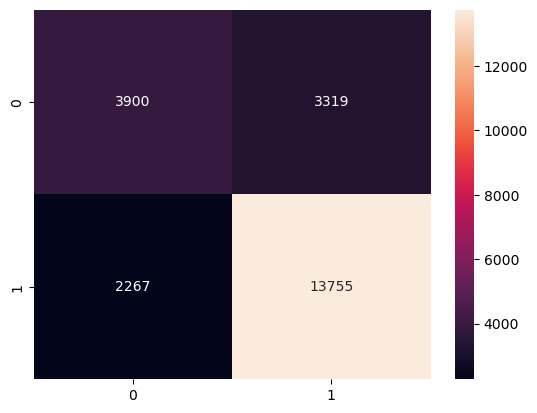

In [79]:
cm=confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True, fmt=".6g")

In [80]:
rfScore=rf.score(X_test,y_test)
rfScore

from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      7219
           1       0.81      0.86      0.83     16022

    accuracy                           0.76     23241
   macro avg       0.72      0.70      0.71     23241
weighted avg       0.75      0.76      0.75     23241



## Decision Tree

In [83]:
dt=DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

dt.fit(X_train, y_train)
dt_prediction=dt.predict(X_test)

In [84]:
dt.score(X_train,y_train)

0.7848199302955983

In [85]:
dt.score(X_test,y_test)

0.7849490125209758

In [86]:
dt_conf_matrix = confusion_matrix(y_test, dt_prediction)

In [87]:
dt_conf_matrix

array([[ 3219,  4000],
       [  998, 15024]])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_prediction)

0.7849490125209758

## Análise de dados relevantes

/var/folders/0n/nft8_zh96k32gb5k561yk3hc0000gn/T/ipykernel_52648/3289450143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['FaixaEtaria'] = pd.cut(df_clean['AGE'], bins=bins, labels=labels, right=False)


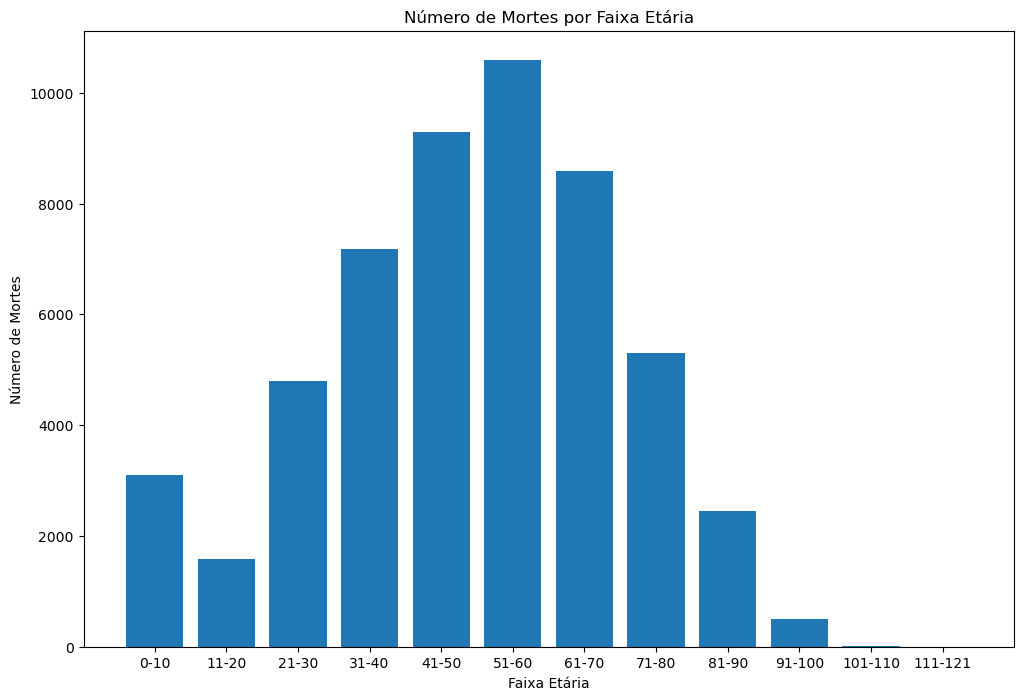

In [95]:
plt.figure(figsize=(12, 8))

#Criação das faxas etárias
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 121]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-121']

#Classificação das idades
df_clean['FaixaEtaria'] = pd.cut(df_clean['AGE'], bins=bins, labels=labels, right=False)

#Contar o número de pessoas que morreram em cada faixa etária
deaths_by_age = df_clean[df_clean['DATE_DIED'] == 1]['FaixaEtaria'].value_counts().sort_index()

plt.bar(deaths_by_age.index, deaths_by_age)

plt.xlabel('Faixa Etária')
plt.ylabel('Número de Mortes')
plt.title('Número de Mortes por Faixa Etária')

plt.show()

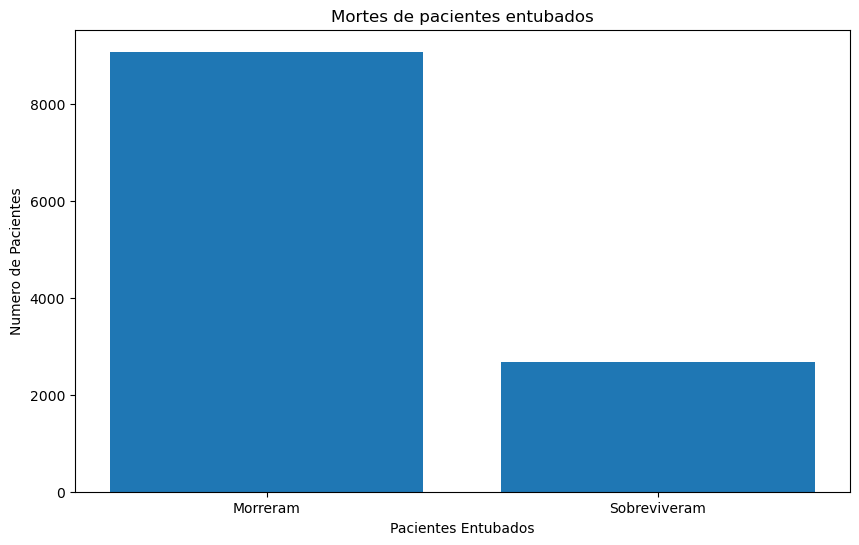

In [105]:
plt.figure(figsize=(10, 6))

# Contagem de pacientes que morreram e sobreviveram
intubed_deaths = df_clean[(df_clean['INTUBED'] == 1) & (df_clean['DATE_DIED'] == 0)].shape[0]
intubed_survived = df_clean[(df_clean['INTUBED'] == 1) & (df_clean['DATE_DIED'] == 1)].shape[0]

plt.bar(['Morreram', 'Sobreviveram'], [intubed_deaths, intubed_survived])

plt.xlabel('Pacientes Entubados')
plt.ylabel('Numero de Pacientes')
plt.title('Mortes de pacientes entubados')

plt.show()

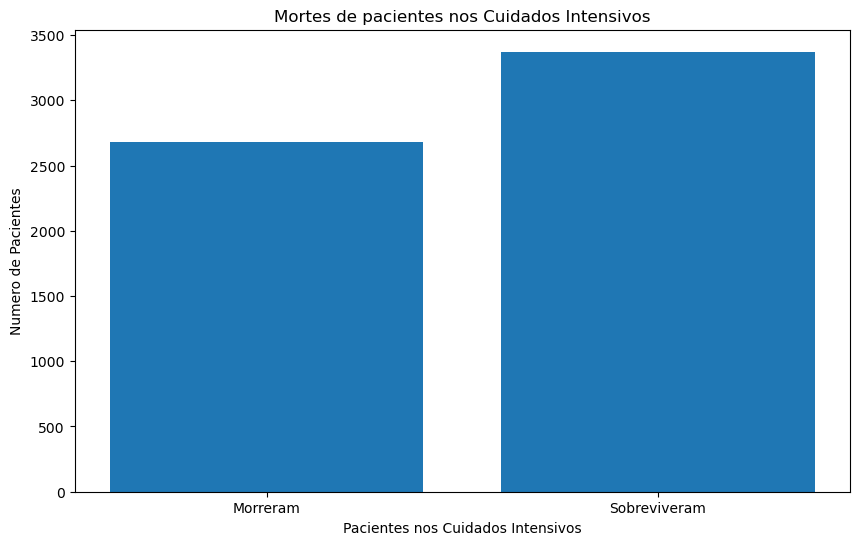

In [106]:
# Relação entre a morte e os pacientes na UTI
plt.figure(figsize=(10, 6))

icu_deaths = df_clean[(df_clean['ICU'] == 1) & (df_clean['DATE_DIED'] == 0)].shape[0]
icu_survived = df_clean[(df_clean['ICU'] == 1) & (df_clean['DATE_DIED'] == 1)].shape[0]

plt.bar(['Morreram', 'Sobreviveram'], [icu_deaths, icu_survived])

plt.xlabel('Pacientes nos Cuidados Intensivos')
plt.ylabel('Numero de Pacientes')
plt.title('Mortes de pacientes nos Cuidados Intensivos')

plt.show()

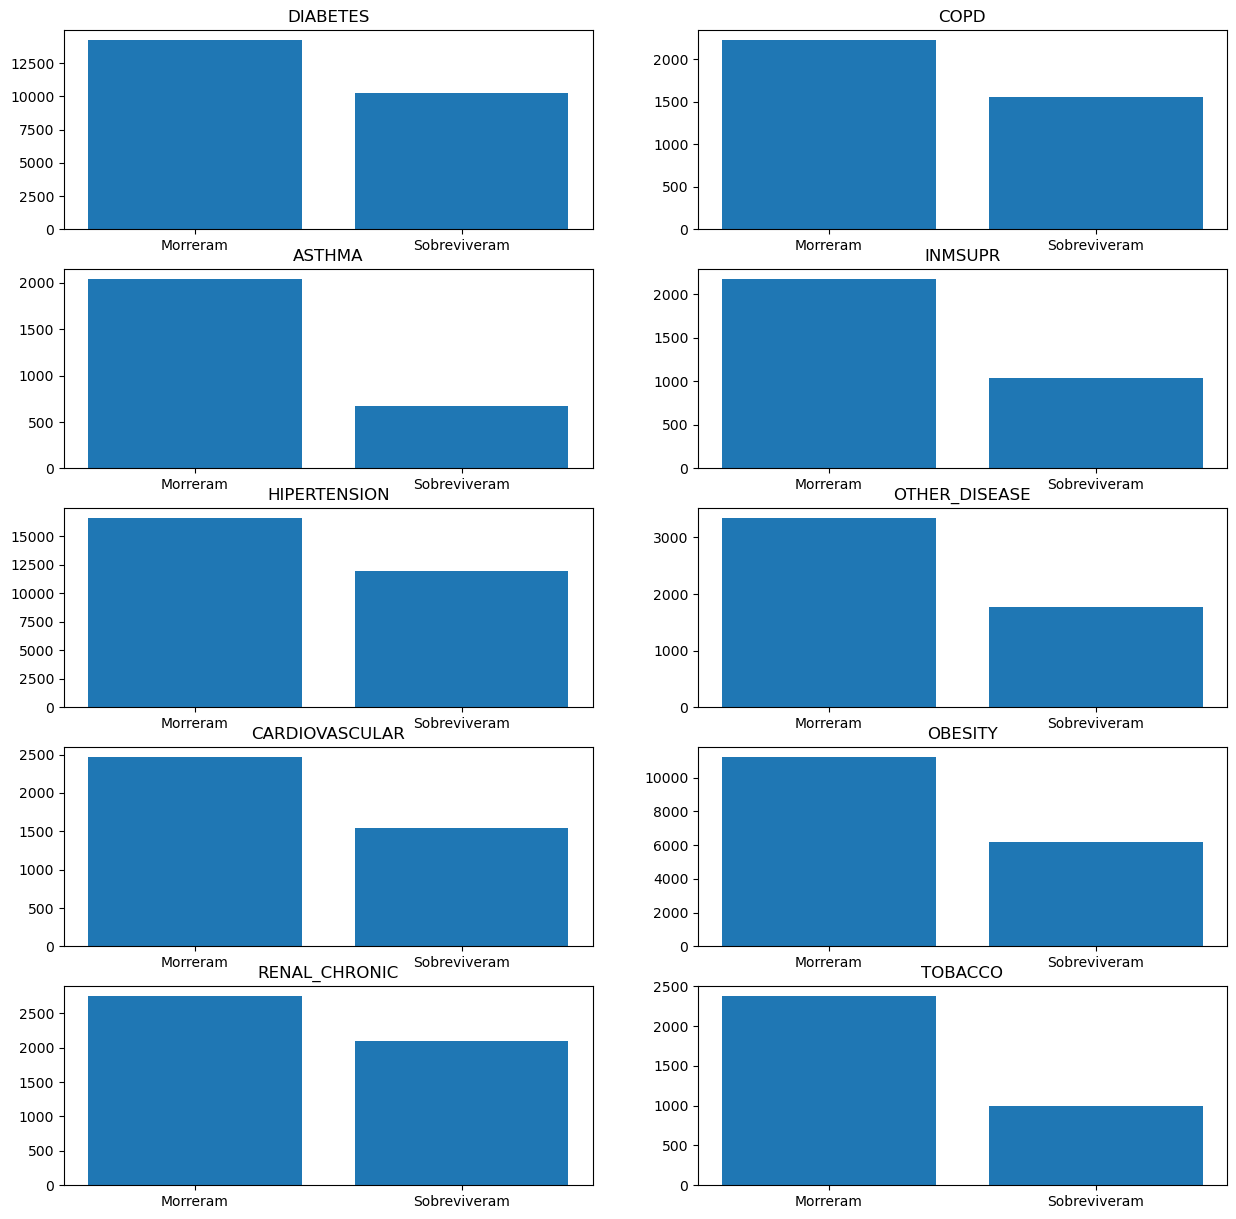

In [104]:
# Relação entre as doenças e a morte
diseases = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# cria no mesmo gráfico a relação entre as doenças e a morte com barras de morte e sobrevivência
fig, ax = plt.subplots(5, 2, figsize=(15, 15))

for i, disease in enumerate(diseases):
    deaths = df_clean[(df_clean[disease] == 1) & (df_clean['DATE_DIED'] == 1)].shape[0]
    survived = df_clean[(df_clean[disease] == 1) & (df_clean['DATE_DIED'] == 0)].shape[0]
    ax[i//2, i%2].bar(['Morreram', 'Sobreviveram'], [deaths, survived])
    ax[i//2, i%2].set_title(disease)

plt.show()

### - Conclusion: There's a relationship between the usmer (level of medical unit treatment) and the admission of patients on icu (intensive care unit)

## Classification

In [ ]:
# Split the dataset into tranining and testing data

In [ ]:
X = df[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES',
        'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'ICU']]
y = df['CLASIFFICATION_FINAL'] # check for covid

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initiate XGBoost and Train it
model = XGBClassifier()
model.fit(X_train, y_train)